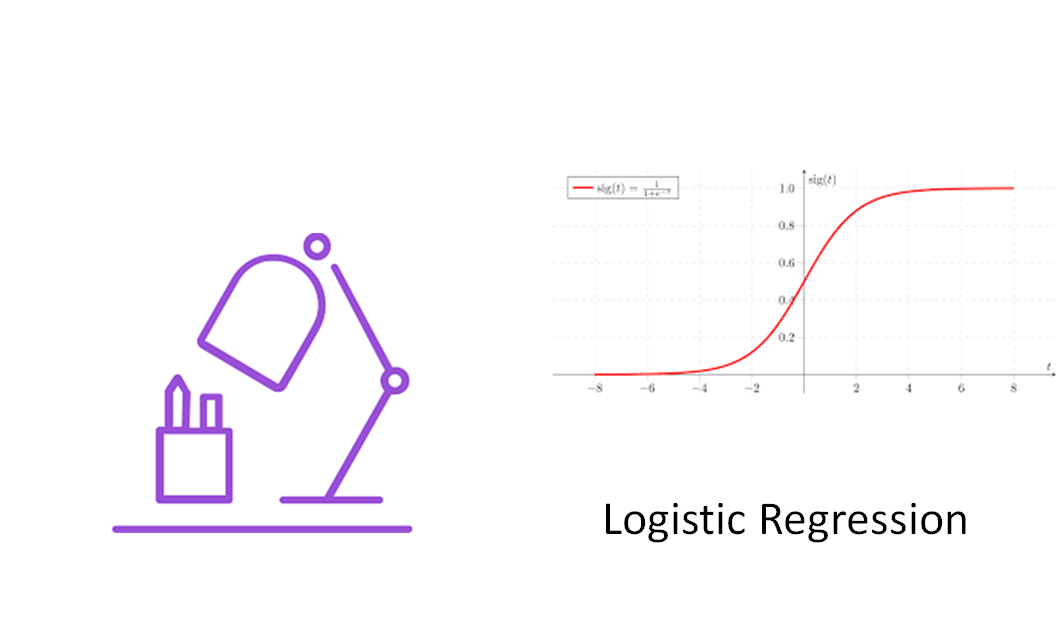

#### Logistic regression / classification  
Logistic regression is a supervised learning model used to perform data classifications in relation to a specific feature target.

Does the medicine given to patients lead to recovery or not? 

Is an email spam or not?

Is a transaction fraudulent or not (yes/no)?

In our workshop, we will build a logistic regression model to predict if a student gets admitted into a university. Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision. Your task is to build a classiﬁcation model that estimates an applicant’s probability of admission based the scores from those two exams. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import minimize

from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [2]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return(data)

In [4]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

In [5]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_6e66e2db78b04f06a0fb0a77e04e36f5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='YiaJob6uTcDVElr7CTjWhrloL9H7tP1gR_GmDWCli8sh',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_6e66e2db78b04f06a0fb0a77e04e36f5.get_object(Bucket='matrix-donotdelete-pr-dch8wobsozzamt',Key='ex2data1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()
data=df_data_1.values[:,0:3]
# The code was removed by Watson Studio for sharing.

In [6]:
data

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ],
       [45.08327748, 56.31637178,  0.        ],
       [61.10666454, 96.51142588,  1.        ],
       [75.02474557, 46.55401354,  1.        ],
       [76.0987867 , 87.42056972,  1.        ],
       [84.43281996, 43.53339331,  1.        ],
       [95.86155507, 38.22527806,  0.        ],
       [75.01365839, 30.60326323,  0.        ],
       [82.30705337, 76.4819633 ,  1.        ],
       [69.36458876, 97.71869196,  1.        ],
       [39.53833914, 76.03681085,  0.        ],
       [53.97105215, 89.20735014,  1.        ],
       [69.07014406, 52.74046973,  1.        ],
       [67.94685548, 46.67857411,  0.        ],
       [70.66150955, 92.92713789,  1.        ],
       [76.97878373, 47.57596365,  1.        ],
       [67.37202755, 42.83843832,  0.   

In [7]:
X = data[:,0:2]
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = y = np.c_[data[:,2]]
print(X)
print(y)

[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]
 [ 1.         45.08327748 56.31637178]
 [ 1.         61.10666454 96.51142588]
 [ 1.         75.02474557 46.55401354]
 [ 1.         76.0987867  87.42056972]
 [ 1.         84.43281996 43.53339331]
 [ 1.         95.86155507 38.22527806]
 [ 1.         75.01365839 30.60326323]
 [ 1.         82.30705337 76.4819633 ]
 [ 1.         69.36458876 97.71869196]
 [ 1.         39.53833914 76.03681085]
 [ 1.         53.97105215 89.20735014]
 [ 1.         69.07014406 52.74046973]
 [ 1.         67.94685548 46.67857411]
 [ 1.         70.66150955 92.92713789]
 [ 1.         76.97878373 47.57596365]
 [ 1.         67.37202755 42.83843832]
 [ 1.         89.67677575 65.79936593]
 [ 1.         50.53478829 48.85581153]
 [ 1.         34.21206098 44.2095286 ]
 [ 1.         77.92409145 68.97235999]
 [ 1.         62.27101367

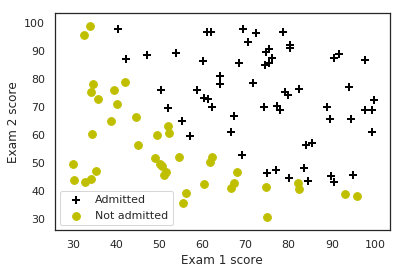

In [8]:
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')


#### Logistic regression hypothesis

If we consider a possible $h(\theta)$ function that can assume the (only) values 0 (false) or 1 (true)

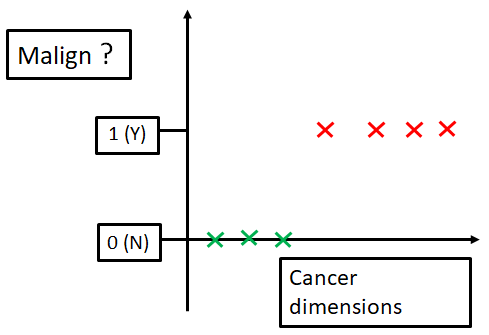

In a continuous approach we can consider the following predictive function 


#### $$ h_{\theta}(x) = g(\theta^{T}x)$$
#### $$ g(z)=\frac{1}{1+e^{−z}} $$

the so called $Sigmoid Function$ that can be drawn in the following 

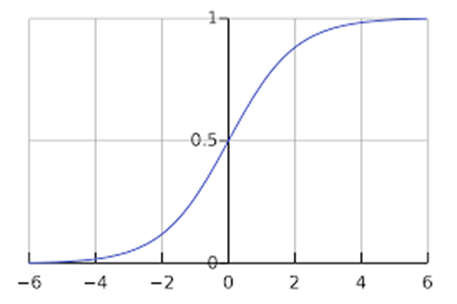

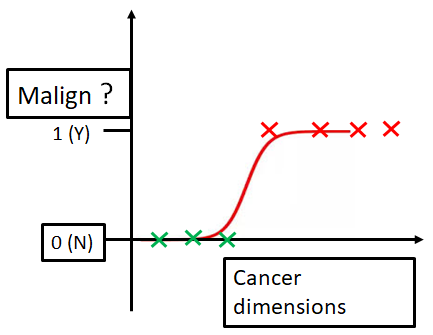

In [11]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

Scipy actually has a convenience function which does exactly the same:<BR>
http://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expit.html#scipy.special.expit

## The vector funtion $$\theta^{T}x$$    

equivalent to

$$h_\theta(x)= \theta_0 + \theta_1x_1 + \theta_2x_2$$ 

is responsible to define the so called Decision Boundary

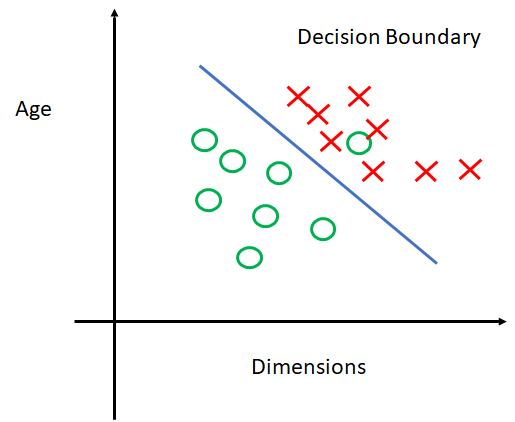

#### We can consider the following Cost Function
#### $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$$

That expresses in summary form the following condition  

$Cost(h(\theta),y)=     \begin{cases} -\log(h_\theta(x), & \text{if}\ y=1 \\      -\log(1-h_\theta(x)), & \text{if}\ y=0    \end{cases} $ 

$Cost =0 \quad if \quad y = 1, h_\theta(x)=1$

$But \quad as \quad h_\theta(x)\to 0 \quad Cost \to \infty$

This capture intuition that if $h_\theta(x)=0 $ but y = 0 we'll penalize learning algorithm by a very large cost
#### The cost function has the following vectorized form
#### $$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)$$

In [12]:
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
               
#    if np.isnan(J[0]):
#        return(np.inf)
    return(J)

In [13]:
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    
    grad =(1/m)*X.T.dot(h-y)

    return(grad.flatten())

In [14]:
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 [0.69314718]
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


#### Optimize cost function

In [15]:
res = minimize(costFunction, initial_theta, args=(X,y), method=None, jac=gradient, options={'maxiter':400})
res

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log


      fun: 0.203497701598751
 hess_inv: array([[ 3.31474479e+03, -2.63892205e+01, -2.70237122e+01],
       [-2.63892205e+01,  2.23869433e-01,  2.02682332e-01],
       [-2.70237122e+01,  2.02682332e-01,  2.35335117e-01]])
      jac: array([-9.52476821e-09, -9.31921317e-07, -2.82608929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 31
      nit: 23
     njev: 31
   status: 0
  success: True
        x: array([-25.16133284,   0.2062317 ,   0.2014716 ])

#### Predict

In [16]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

In [17]:
# Student with Exam 1 score 45 and Exam 2 score 85
# Predict using the optimized Theta values from above (res.x)
sigmoid(np.array([1, 45, 85]).dot(res.x.T))

0.7762907240554389

In [18]:
p = predict(res.x, X) 
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))

Train accuracy 89.0%


#### Decision boundary

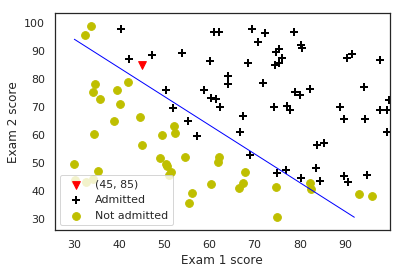

In [19]:
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');

